# TP 3 
#### Monday,  October 12, 2020

## Diffusion equation

The diffusion equation (also called heat equation) 

$$ \partial_t u(x,t) = D \ \nabla^2 u(x,t) $$

where $D$ is the diffusion coefficient, appears on a lot of physical phenomena in mechanics.

The 1D version gives
$$ \partial_t u(x,t) = D \ \partial^2_{xx} u(x,t) $$


### I - Explicit integration scheme

A trivial discretization of the diffusion equation is

$$ \frac{u_i^{n+1}-u_i^n}{\Delta t}  = F(u_i^n) \simeq D \frac{u_{i-1}^{n}- 2 u_i^n + u_{i+1}^{n} }{(\Delta x)^2} $$

with $i$ the space index and $n$ the time index.

Using the Euler method of TP2 write a function **euler(U0,BC,L,dt,t_max)** with $U0$ the initial conditions, $BC$ a scalar for choosing the boundary conditions, $L$ the domain length, $dt$ the time step and $t_{max}$ the total time of the simulation. We suppose $D=1$. 

We want to study the effects of the boundary conditions ($BC$) and the initial conditions ($U0$) using the following relations

- BC1 ==>  $u(0,t) = 0$ and $u(L,t) = 0$
- BC2 ==>  $u(0,t) = 0$  $\partial_x u(L,t) = 0$
- U01 ==>  smooth initial condition $u(x,0) \sim f(\sin(x))$
- U02 ==>  discontinous initial condition $u(x,0) \sim \mathcal{H}(L/2)$ using Heaviside or step function.

 
Test the stability of the numerical scheme

1. for BC1 and U01 by changing the time step $dt$ ;
2. identify the criteria to obtain a stable numerical scheme. What happens for D=2, 3, 5?
2. study the boundary condition BC2 for U01 and U02.    

    
To illustrate the solution behavior, plot every 100 time steps the solution $u(x\in[0:L])$ on the same figure. 
We take $L = 1$, $tmax = 0.1$, $N = 100$ and make varying the time step from $dt=10^{-5}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math as m

from decimal import Decimal

## Part 1

We have the following diffusion equation (in explicit scheme)
$$ \frac{u_i^{n+1}-u_i^n}{\Delta t}  = F(u_i^n) \simeq D \frac{u_{i-1}^{n}- 2 u_i^n + u_{i+1}^{n} }{(\Delta x)^2} $$

Which rewrites as :

$$ u_i^{n+1} = u_i^n + D\frac{\Delta t}{\Delta x^2}(u_{i-1}^{n} - 2 u_i^n + u_{i+1}^{n}) $$

We then get a formulation for u at next iteration ($u_i^{n+1}$) in function of u at previous iteration, at different position ($i+1$, $i$, $i-1$).

This is this formulation that we will us to solve numerically the diffusion equation.

### Q 1 - Displaying the numerical scheme

In [3]:
def euler(U0, BC, L, Nx, dt, t_max):    
    # space step
    dx = L/(Nx-1)
    
    Nt = int(t_max/dt)
    
    # factor
    F = dt/dx**2
    
    u_n      = np.zeros([Nx, Nt+1]) # Nx+1 to go from 0 to N
    u_n[:,0] = U0
    
    for t in range(Nt):
        for x in range(1, Nx-1):
            u_n[x,t+1] = u_n[x,t] + F*(u_n[x+1,t] - 2*u_n[x,t] + u_n[x-1,t])
            
        # BC
        if BC == 0:
            u_n[0,t+1]  = 0; u_n[Nx-1,t+1] = 0
        elif BC == 1:
            u_n[0,t+1]  = 0; u_n[Nx-1,t+1] = u_n[Nx-2,t+1]
        else:
            print("Error for the BC, please choose BC = 0 or 1, here BC = {}".format(BC))
            break  
            
    return u_n

In [50]:
# Main code

# Length
L  = 1    # Length of the mesh
T  = 0.1  # Time of the study

# Nb iteations
Nx = 100
dt = 3*10**-5

# step
dx = L/(Nx-1)

# CFL condition

CFL = dt/(dx**2)

if CFL <= 0.5:
    print("Mesh well-defined : CFL number = %.2f <= 0.5" %(CFL))
    
    x  = np.linspace(0, L, Nx)

    U0_1 = np.zeros([x.size])
    U0_2 = np.zeros([x.size])

    # Initial repartition
    U0_1             = np.sin(x*2*np.pi/L) # normalisation sinus
    U0_2[:]          = 1
    U0_2[:int(x.size/2)] = 0

    # -----------------------------------------------------------------------

    # Initial repartition under vector form
    U0 = [U0_1, U0_2]

    # -----------------------------------------------------------------------
    
    # BC          : 0 == BC1       & 1 == BC2
    # U0          : U0[0] == UC1   & U0[0] == UC2
    BC = 0
    
    U_0_0 = euler(U0[0], BC, L, Nx, dt, T)

    print("There are {} iterations".format(int(T/dt)))

elif CFL > 0.5:
    print("Mesh ill-defined : CFL number = %.2f > 0.5 \nPlease refine the mesh" %(CFL))
    
# end loop and code

Mesh well-defined : CFL number = 0.29 <= 0.5
There are 3333 iterations


#### BC1 + U01

Text(0, 0.5, '$u_n(x)$')

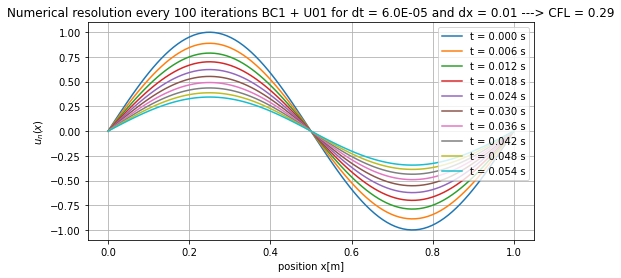

In [55]:
# Displaying the solution every 100 time steps

fig = plt.figure(figsize=(8,4))

# --------------------------------------------------------------------------------------
Nt = T/dt
t = [100*k for k in range(10)] # range provides the number of iteration while 50*k the time considered

for k in t:
    plt.plot(x, U_0_0[:,k:k+1], label = 't = %.3f s' %(k*dt))
plt.grid('True')

plt.legend()

plt.title('Numerical resolution every 100 iterations BC1 + U01 for dt = %.1E and dx = %.2f ---> CFL = %.2f' %(Decimal(dt), dx, CFL))
plt.xlabel('position x[m]')
plt.ylabel('$u_n(x)$')


We see that the quantity inside the mesh at t = 0 is spread outside the mesh, the quantity flattening across time.
In the end, it leaks through the walls on each side (non zero flux), while it's equal to zero at the left and right boundaries (zero qtty), as expected from the BC1.

Let's now see what happens for a zero flux condition at one of the boundary before studying the method's stability.

#### BC2 + U01 & U02

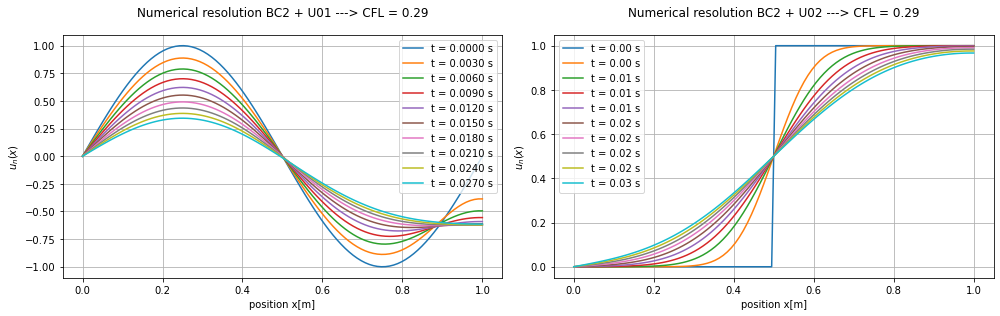

In [52]:
# BC = 1 - no flux at x = L

fig = plt.figure(figsize=(14,4.5))

U_0_1 = euler(U0[0], 1, L, Nx, dt, T)
U_1_1 = euler(U0[1], 1, L, Nx, dt, T)

t = [100*k for k in range(10)]

# ---------------------------------------------------------------------------------

#subplot 1
ax  = fig.add_subplot(121)
for k in t:
    ax.plot(x, U_0_1[:,k:k+1], label = 't = %.4f s' %(k*dt))
plt.grid('True')

plt.legend()

plt.title('Numerical resolution BC2 + U01 ---> CFL = %.2f' %CFL)
ttl = ax.title
ttl.set_position([0.5, 1.05])

plt.xlabel('position x[m]')
plt.ylabel('$u_n(x)$')

# ---------------------------------------------------------------------------------

#subplot 2
ax  = fig.add_subplot(122)
for k in t:
    ax.plot(x, U_1_1[:,k:k+1], label = 't = %.2f s' %(k*dt))
plt.grid('True')

plt.legend()

plt.title('Numerical resolution BC2 + U02 ---> CFL = %.2f' %CFL)
ttl = ax.title
ttl.set_position([0.5, 1.05])

plt.xlabel('position x[m]')
plt.ylabel('$u_n(x)$')

fig.tight_layout()

We observe easily that the quantity now doesn't leak through the right wall, but only through the left one. Therefore, the flow takes more time to flatten.
However, the quantity stays equal to zero at the left hand side.

### Q 2 - Stability of the numerical scheme

#### BC1 + U01

Text(0, 0.5, 'u_n(x)')

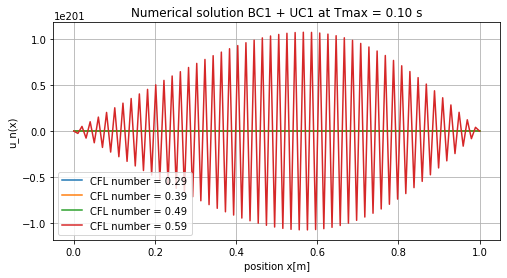

In [56]:
# Displaying results - influence over dt

fig = plt.figure(figsize=(8,4))

dt = 10**-5

t = [k for k in range(3,7)]

# ---------------------------------------------------------------------------------

#subplot 1
for k in t:
    dt = 10**-5 * k
    u  = euler(U0[0], 0, L, Nx, dt, T) 
    plt.plot(x, u[:,-1], '-', label = 'CFL number = %.2f' %(dt/dx**2))
    plt.legend()
    
plt.grid()
    
plt.title('Numerical solution BC1 + UC1 at Tmax = %.2f s' %T)
plt.xlabel('position x[m]')
plt.ylabel('u_n(x)')

One can see that the function u_n gets destructive once we are at $CFL$ ~= $0.50$, then our numerical solution isn't stable anymore. This CFL number is in fact defined from a relation bounding the variables $T$, $L$, $N_x$ & $d_t$ ; and at the limit of stability we have :

$$D\frac{dt}{dx^2} = C \rightarrow \frac{T}{N_t}\times(\frac{N_x}{L})^2 = C$$ with $C \in \mathbb{R}$ and D = 1 here

From our numerical analysis we thus showed that this constant C is in the case of the explicit method equal to 0.50.
This number is the limit one below which we must stay to ensure the stability of this method, such that :

$$D\frac{dt}{dx^2} \leq 0.50$$

In fact, we take a T big enough to conclude on the CFL number such that we are sure of the presence of discontinuity (the discontinuity might indeed only show after  certain time while at low time it behaves stable).


Similarly, let's make the same study with both the initial normalized sinus and the Heaviside function for BC2.

#### BC2 + U01 & U02

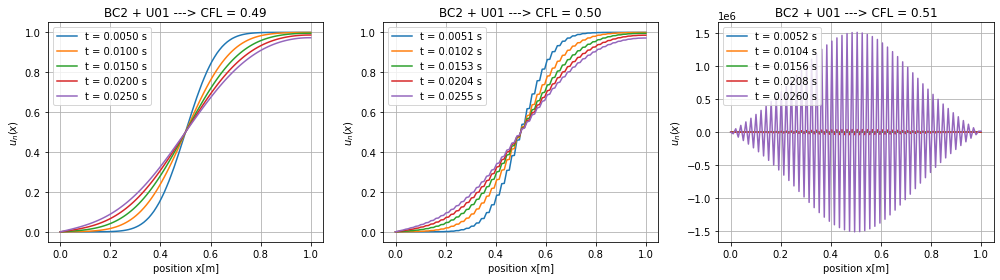

In [57]:
# Influence over dt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(14,4))

# ------------------------------------------------------------------

dt = [5*10**-5, 5.1*10**-5, 5.2*10**-5]

t = [100*k for k in range(1,6)] # range provides the number of iteration while X*k the time considered

# ------------------------------------------------------------------

lines = []  # vector for legends   
    
# BC          : 0 == BC1       & 1 == BC2
# U0          : U0[0] == UC1   & U0[0] == UC2
BC         = 1
    
for d in range(np.size(dt)):
    
    lines = []  # vector for legends   

    for k in t:
        u = euler(U0[1], BC, L, Nx, dt[d], T)
        lines += axes[d].plot(x, u[:,k:k+1], label = 't = %.4f s' %(k*dt[d]))

        axes[d].grid('True')
        
        axes[d].set_title('BC2 + U01 ---> CFL = %.2f' %(dt[d]/dx**2))
        axes[d].set_xlabel('position x[m]')
        axes[d].set_ylabel('$u_n(x)$')
        
        labels = [l.get_label() for l in lines]
        axes[d].legend(lines, labels)
fig.tight_layout()

Similarly, we come up to the same result. We indeed see that for CFL <= 0.50, the solution is stable or nearly stable. Then once CFL number > 0.50, we get a destructive solution for the same range of time.

We conclude on the fact that the $\mathbf{CFL}$ $\mathbf{number}$ $\mathbf{0.50}$ defined previously is $\mathbf{attached}$ $\mathbf{to}$ $\mathbf{the}$ $\mathbf{explicit}$ $\mathbf{method}$, rather than the BC or CI.

Finally, if one consider $\mathbf{different}$ $\mathbf{diffusion}$ $\mathbf{coefficient}$ $\mathbf{D}$, here is what one get : 

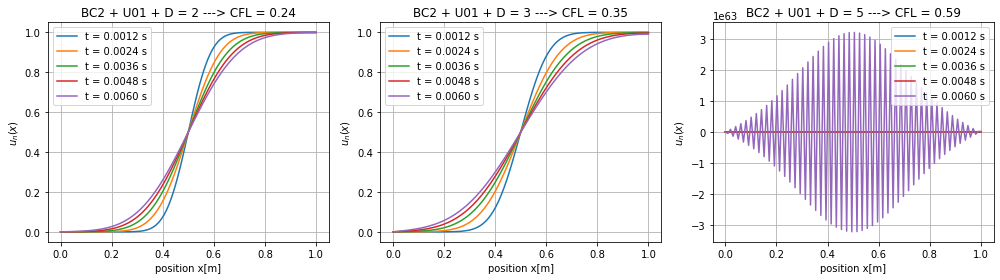

In [58]:
# Influence over D

D = [2,3,5]

dt = 1.2 * 10**-5
t = [100*k for k in range(1,6)] # range provides the number of iteration while X*k the time considered

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(14,4))

# ------------------------------------------------------------------

    
# BC          : 0 == BC1       & 1 == BC2
# U0          : U0[0] == UC1   & U0[0] == UC2
BC         = 1
    
for d in range(np.size(D)):
    lines = []  # vector for legends   

    for k in t:
        u = euler(U0[1], BC, L, Nx, D[d]*dt, T)
        lines += axes[d].plot(x, u[:,k:k+1], label = 't = %.4f s' %(k*dt))

        axes[d].grid('True')
        
        axes[d].set_title('BC2 + U01 + D = %d ---> CFL = %.2f' %(D[d], D[d]*dt/dx**2))
        axes[d].set_xlabel('position x[m]')
        axes[d].set_ylabel('$u_n(x)$')
        
        labels = [l.get_label() for l in lines]
        axes[d].legend(lines, labels)
fig.tight_layout()

Recalling the previous relation for the CFL number :

$$D\frac{dt}{dx^2} = 0.50 $$

we see that by changing D, we change the CFL number. Therefore, to increase the diffusion coefficient might bring the system into a destructive behavior, as you can see on the graphs here above.

### II - Explicit integration scheme - vectorized version

#### We want to accelerate the computation, then we have to vectorize the loop into the Euler function. 

1. Give a vectorization of the loop over space in Euler function.
2. Propose a new function **Euler_new(U0,BC,Vectorized,L,dt,t_max))**
with Vectorized a scalar (equal to 1 or 0) switching between "vectorized" and "non-vectorized" implementation.
3. Compute and compare the execution time of both approaches.


### Q 1 & 2 - Vectorized approach

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import math as m

from decimal import Decimal

In [12]:
def euler_new(U0, BC, Vectorized, L, Nx, dt, t_max):    
    
    # space step
    dx = L/(Nx-1)
    
    Nt = int(t_max/dt)

    # factor
    D = 1
    F = D*dt/dx**2
    
    # Defining matrix solution
    u_n         = np.zeros([Nx+2,Nt+1])
    u_n[1:-1,0] = U0
 
    for t in range(Nt):
        if Vectorized == 1:
            u_n[1:-1,t+1] =  u_n[1:-1,t] + F*(u_n[2:,t] - 2*u_n[1:-1,t] + u_n[:-2,t]) 
        
        elif Vectorized == 0:
            for x in range(1, Nx+1):
                u_n[x,t+1] = u_n[x,t] + F*(u_n[x+1,t] - 2*u_n[x,t] + u_n[x-1,t]) 
        else:
            raise("Error, Vectorized must be equal to 0 or 1, here = {}".format(Vectorized))
            break
            
        if BC == 0:
            u_n[0,t+1]  = 0; u_n[Nx+1,t+1] = 0
        elif BC == 1:
            u_n[0,t+1]  = 0; u_n[Nx+1,t+1] = u_n[Nx,t+1]
        else:
            print("Error for the BC, please choose BC = 0 or 1, here BC = {}".format(BC))
            break   
            
    return u_n

In [13]:
# Main code

# Length
L  = 1    # Length of the mesh
T  = 0.1    # Time of the study

# Nb iteations
Nx = 100
dt = 10**-5

# step
dx = L/(Nx-1)

CFL = dt/dx**2   # as D=1

if CFL <= 0.5:
    print("Mesh well-defined : CFL number = %.1f <= 0.5" %(CFL))

    x  = np.linspace(0, L, Nx)
    
    U0_1 = np.zeros([x.size])
    U0_2 = np.zeros([x.size])

    # Initial repartition
    U0_1             = np.sin(x*2*np.pi/L) # normalisation sinus
    U0_2[:]          = 1
    U0_2[:int(Nx/2)] = 0

    # -----------------------------------------------------------------------

    # Initial repartition under vector form
    U0 = [U0_1, U0_2]

    # -----------------------------------------------------------------------
    
    # BC          : 0 == BC0       & 1 == BC1
    # Vectcorized : 0 == as before & 1 == new_method
    # U0          : U0[0] == UC1   & U0[0] == UC2
    BC         = 0
    Vectorized = 0
    
    u_n = euler_new(U0[0], BC, Vectorized, L, Nx, dt, T)
    
elif CFL > 0.5:
    print("Mesh ill-defined : CFL number = %.1f > 0.5 \nPlease refine the mesh" %(CFL))
    
# end loop and code

Mesh well-defined : CFL number = 0.1 <= 0.5


In [20]:
# Execution time comparison

from time import time

t0 = time()
euler_new(U0[0], 1, 0, L, Nx, dt, T)
t1 = time() - t0

print("Without vectorization - Time of execution ~= %.2f... s" %t1)

# ------------------------------------------------------------------

t0 = time()
U_1_1_vec = euler(U0[1], 1, L, Nx, dt, T)
t2 = time() - t0

print("With vectorization    - Time of execution ~= %.2f... s\n" %t2)

# ------------------------------------------------------------------

# Overall comparison through absolute error calculation

print("The absolute error is equal to {:.2%}".format((t1 - t2)/t1))
print("Meaning that with vectorization we are {:.2%} faster than without for t = {}s".format((t1 - t2)/t1, T))


Without vectorization - Time of execution ~= 2.61... s
With vectorization    - Time of execution ~= 2.35... s

The absolute error is equal to 10.09%
Meaning that with vectorization we are 10.09% faster than without for t = 0.1s


<Figure size 1008x324 with 0 Axes>

### III - Implicit integration schema

The implicit version comes from 
$$ \frac{u_i^{n+1}-u_i^n}{\Delta t}  = F(u_{i}^{n+1})$$

1. Write the implicit scheme as $A x = b$
2. Implement the algorithm into a **Euler_imp(U0,BC,Vectorized,L,dt,t_max))** function.
3. Redo the same analyse than before.
4. Compute the time execution and compare it against the explicit approach.

### Q 1 - Implicit scheme

We have 2 cases :
    - BC1 : We impose a zero value at x = 0 and x = L
    - BC2 : We impose a zero value at x = 0 and a zero flux at x = L
   
These two cases imply both a different matrix A for the system Ax = b. 

In details: 

    i. the previous iteration made on u_n becomes : 
$$ u_i^{n+1} = u_i^n + D\frac{\Delta t}{\Delta x^2}(u_{i-1}^{n+1} - 2 u_i^{n+1} + u_{i+1}^{n+1}) $$
        Note that we have at the right hand side terms at n+1 (next iteration). 
        
    ii. we rewrite :
$$ u_i^{n+1} - D\frac{\Delta t}{\Delta x^2}(u_{i-1}^{n+1} - 2 u_i^{n+1} + u_{i+1}^{n+1}) = u_i^n $$

    iii. here comes the distinction :
        a. if BC = BC1 : u(0,t) = 0 & u(L,t) = 0 and so u(0,t) = 0 & u(Nx,t) = 0
        b. if BC = BC2 : u(0,t) = 0 & d_x(u(L,t)) = 0 and so u(0,t) = 0 & u(Nx,t) = u(Nx-1,t) from  Taylor-Lagrange's DL.

$$ $$

Indeed : $$u(x-\Delta x, t) = u(x, t) - \Delta x \partial_x u(x,t) + o(\Delta x^2)$$

$$\rightarrow \partial_x u(x,t) = \frac{u(x, t) - u(x-\Delta x, t)}{\Delta x} + o(\Delta x^2)$$

Neglecting the higher order term $o(\Delta x^2)$, under discrete form and by application of the BC : 

$$\partial_x u(Nx,t) = \frac{u(Nx, t) - u(Nx-1, t)}{\Delta x} = 0$$

$$\rightarrow u(Nx, t) = u(Nx-1, t)$$ as mentioned before.

$$ $$

For what is up to the matrix A, it is defined from the left end side : 
$$u_i^{n+1} - D\frac{\Delta t}{\Delta x^2}(u_{i-1}^{n+1} - 2 u_i^{n+1} + u_{i+1}^{n+1})$$

We in fact try to simplify this term into the multiplication between a matrix A and $u_i^{n+1}$.

We will here have $A = I - F\times M$ with I the identity matrix, F the coefficient $D\frac{\Delta t}{\Delta x^2}$, and M a matrix to be determined.

It's finally this last matrix that will differentiate the two cases BC1 & BC2.

We finally have two matrices M, one for each BC :
    
BC1 : M1 
=
\begin{bmatrix}
-2      & 1 & 0 & \cdots &  0 \\ 
1   & -2 & 1 & \cdots & 0 \\
\vdots & \ddots & \ddots & \ddots & \vdots \\ 
0  & \cdots & 1 & -2 & 1 \\
0      & \cdots & 0 & 1 & -2
\end{bmatrix}

BC2  : M2 
=
\begin{bmatrix}
-2      & 1 & 0 & \cdots &  0 \\ 
1   & -2 & 1 & \cdots & 0 \\
\vdots & \ddots & \ddots & \ddots & \vdots \\ 
0  & \cdots & 1 & -2 & 1 \\
0      & \cdots & 0 & 1 & -1
\end{bmatrix}

Finally, we see that the difference results into the term at M(Nx, Nx), where we have either -2 or -1.

In either case we get :

$$(I - F\times M)u_i^{n+1} = u_i^{n}$$ 

$$==>    Au_i^{n+1} = u_i^{n}$$

$$==>    Ax = b$$

we then search for $x = u_i^n+1$ (solution at next iteration).

### Q 2 - Method implementation

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.linalg   # SciPy Linear Algebra Library

In [22]:
def euler_imp(U0, BC, Vectorized, L, Nx, dt, t_max):    
    
    Nt = int(t_max/dt)
    
# -----------------------------------------------------------------------

    # A = I - F*M

    M = np.zeros([Nx,Nx])

    # From shape u_{i+1} - 2u_i + u_{i-1}
    for k in range(Nx):
        M[k,k] = -2

    for k in range(Nx-1):
        M[k,k+1] = 1
        M[k+1,k] = 1
        
    # Application boundary condition
    if BC == 0:
        M = M    # M unchanged
    elif BC == 1:
        M[Nx-1,Nx-1] = -1
    else:
        print("Error for the BC, please choose BC = 0 or 1, here BC = {}".format(BC))
        
    # Creation  matrix A
    I = np.eye(x.size,x.size)
    A = I - F*M               # A

# -----------------------------------------------------------------------

    # Resolving system Ax = b
    u_n   = np.zeros([Nx])
    u_sol = np.zeros([Nx])
    u_n   = U0                # b --- x
    
    # P,L,U decomposition
    P, L, U = scipy.linalg.lu(A)
    P_1 = np.linalg.inv(P)
    L_1 = np.linalg.inv(L)
    U_1 = np.linalg.inv(U)

    y = np.zeros([Nx])
    z = np.zeros([Nx])
    
# -----------------------------------------------------------------------
    
    for t in range(Nt):
        if Vectorized == 0:
            u_sol = np.linalg.solve(A, u_n)
            u_n   = u_sol
            
        elif Vectorized == 1:
            
            z     = np.dot(P_1, u_n)
            y     = np.dot(L_1, z)
            u_sol = np.dot(U_1, y)

            u_n = u_sol.copy()
            
        else:
            raise("Error, Vectorized must be equal to 0 or 1, here = {}".format(Vectorized))
            break
    return u_n

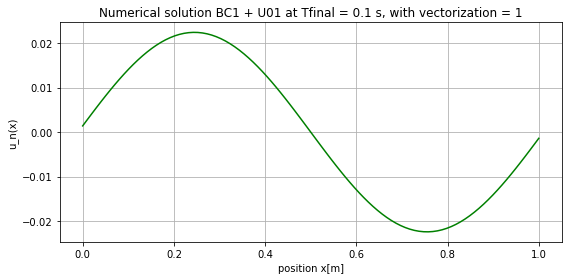

In [63]:
# Main code

# Length
L  = 1    # Length of the mesh
T  = 0.1  # Time of the study

# Nb iteations
Nx = 100
dt = 3*10**-5

# space step
dx = L/(Nx-1)
    
# factor
D = 1
F = D*dt/dx**2

x  = np.linspace(0, L, Nx)

# -----------------------------------------------------------------------
# CI

U0_1 = np.zeros([x.size])
U0_2 = np.zeros([x.size])

# Initial repartition
U0_1             = np.sin(x*2*np.pi/L) # normalisation sinus
U0_2[:]          = 1
U0_2[:int(Nx/2)] = 0

# Initial repartition under vector form
U0 = [U0_1, U0_2]

# -----------------------------------------------------------------------

# BC          : 0 == BC0       & 1 == BC1
# Vectcorized : 0 == as before & 1 == new_method
# U0          : U0[0] == UC1   & U0[0] == UC2
BC         = 0
Vectorized = 1

# -----------------------------------------------------------------------

fig = plt.figure(figsize=(8,4))

u_sol = euler_imp(U0[0], BC, Vectorized, L, Nx, dt, T)

plt.plot(x, u_sol, 'g-')
plt.grid('True')

plt.title('Numerical solution BC{} + U01 at Tfinal = {} s, with vectorization = {}'.format(BC+1, T, Vectorized))
plt.xlabel('position x[m]')
plt.ylabel('u_n(x)')

fig.tight_layout()

 ### Q 3 - Stability Analysis

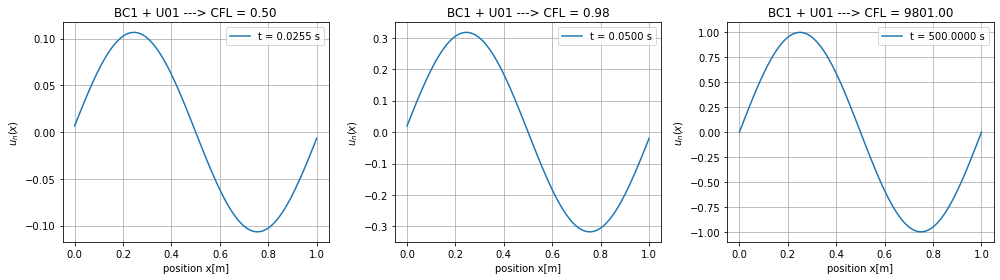

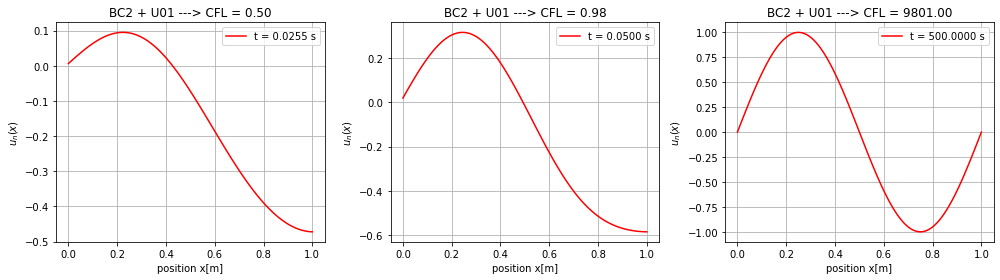

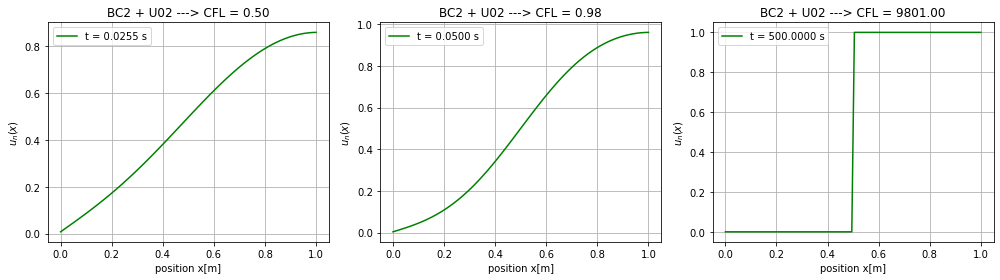

In [66]:
# Displaying the solution every 100 time steps

# Influence over dt

dt = [5.1*10**-5, 10*10**-5, 10**5 * 10**-5]

# ------------------------------------------------------------------

fig, axes = plt.subplots(nrows = 1, ncols = len(dt), figsize=(14,4))

# ------------------------------------------------------------------
    
# BC          : 0 == BC1       & 1 == BC2
# Vectcorized : 0 == as before & 1 == new_method
# U0          : U0[0] == UC1   & U0[0] == UC2
BC         = 0
Vectorized = 0

for d in range(np.size(dt)):
    
    lines = []  # vector for legends   
    
    u = euler_imp(U0[0], BC, Vectorized, L, Nx, dt[d], T)

    lines += axes[d].plot(x, u, label = 't = %.4f s' %(k*dt[d]))

    axes[d].grid('True')
        
    axes[d].set_title('BC1 + U01 ---> CFL = %.2f' %(dt[d]/dx**2))
    axes[d].set_xlabel('position x[m]')
    axes[d].set_ylabel('$u_n(x)$')
        
    labels = [l.get_label() for l in lines]
    axes[d].legend(lines, labels)

fig.tight_layout()
    
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------

fig, axes = plt.subplots(nrows = 1, ncols = len(dt), figsize=(14,4))

# ------------------------------------------------------------------
    
# BC          : 0 == BC1       & 1 == BC2
# Vectcorized : 0 == as before & 1 == new_method
# U0          : U0[0] == UC1   & U0[0] == UC2
BC         = 1
Vectorized = 0

for d in range(np.size(dt)):
    
    lines = []  # vector for legends   
    
    u = euler_imp(U0[0], BC, Vectorized, L, Nx, dt[d], T)

    lines += axes[d].plot(x, u, 'r-', label = 't = %.4f s' %(k*dt[d]))

    axes[d].grid('True')
        
    axes[d].set_title('BC2 + U01 ---> CFL = %.2f' %(dt[d]/dx**2))
    axes[d].set_xlabel('position x[m]')
    axes[d].set_ylabel('$u_n(x)$')
        
    labels = [l.get_label() for l in lines]
    axes[d].legend(lines, labels)
    
fig.tight_layout()
    
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------

fig, axes = plt.subplots(nrows = 1, ncols = len(dt), figsize=(14,4))

# ------------------------------------------------------------------
    
# BC          : 0 == BC1       & 1 == BC2
# Vectcorized : 0 == as before & 1 == new_method
# U0          : U0[0] == UC1   & U0[0] == UC2
BC         = 1
Vectorized = 0

for d in range(np.size(dt)):
    
    lines = []  # vector for legends   
    
    u = euler_imp(U0[1], BC, Vectorized, L, Nx, dt[d], T)

    lines += axes[d].plot(x, u, 'g-', label = 't = %.4f s' %(k*dt[d]))

    axes[d].grid('True')
        
    axes[d].set_title('BC2 + U02 ---> CFL = %.2f' %(dt[d]/dx**2))
    axes[d].set_xlabel('position x[m]')
    axes[d].set_ylabel('$u_n(x)$')
        
    labels = [l.get_label() for l in lines]
    axes[d].legend(lines, labels)
    
fig.tight_layout()

We see no destructive behavior, even at high CFL number.

The fact that no destructive behavior is being observed comes from the fact that the implicit formulation is unconditionally stable. Even though, the time step dt has influence through the precision of the result.

We then have for the third graph here that we have only 1 iteration to get to the solution (thus the solution is equal to the initial one). Therefore, every CFL for which we do 1 iteration, less and more work here, hence the unconditionally stable term.

To end up with this part and the TP in itself, we are about to compare the time of execussion of the system resolution's method with and without vectorization.

### Q 4 - Time comparison

In [43]:
# Execution time comparison - Implicit with and without vectorization

from time import time

fig = plt.figure(figsize=(14,4.5))

dt = 10**-5

# BC          : 0 == BC0       & 1 == BC1
# Vectcorized : 0 == as before & 1 == new_method
# U0          : U0[0] == UC1   & U0[0] == UC2
BC         = 0

# -----------------------------------------------------------------

t01 = time()
euler_imp(U0[0], BC, 0, L, Nx, dt, T)
t1 = time() - t01

print("Without vectorization - Time of execution ~= %.2f... s" %t1)

# ------------------------------------------------------------------

t02 = time()
euler_imp(U0[0], BC, 1, L, Nx, dt, T)
t2 = time() - t02

print("With vectorization    - Time of execution ~= %.2f... s\n" %t2)

# ------------------------------------------------------------------

# Overall comparison through absolute error calculation

print("The absolute error is equal to {:.2%}".format((t1 - t2)/t1))
print("Meaning that with vectorization we are {:.2%} faster than without at T = {} s".format((t1 - t2)/t1, T))


Without vectorization - Time of execution ~= 1.09... s
With vectorization    - Time of execution ~= 0.19... s

The absolute error is equal to 82.74%
Meaning that with vectorization we are 82.74% faster than without at T = 0.1 s


<Figure size 1008x324 with 0 Axes>

## Conclusion - TP3

Excplicit scheme - step time dependant $\rightarrow$ $CFL = D\frac{dt}{dx^2} \leq 0.50$

Implicit scheme  - not step time dependant $\rightarrow$ unconditionally stable

Vectorization : 
    - Part 2 : Economy of time calculation and code readability
    - Part 3 : Big economy of time more than space (up to 50-80%)

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))

ax.plot(x, x+1, color = 'red', lw = 2, linestyle = '-.')